# Grade: /100 points

# Assignment 01: Supervised learning, Linear models, and Loss functions

In this assignment, you're going to write your own methods to fit a linear model using either an OLS or LAD cost function.  

## Data set 

We will examine a data set containing 200 observations. The data set has 3 variables:

1. $y$: the outcome of interest.
2. $x1$: first predictor.
3. $x2$: second predictor.

## Follow These Steps Before Submitting
Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


## Preliminaries

In [1]:
# Import all the necessary packages: 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
from sklearn import linear_model
import seaborn as sns

%matplotlib inline

#### Before you start...

Recall that L1 loss function (sum of magnitudes, used for LAD model):

$$L_1(\theta) = \sum_{i=1}^{n} \lvert {y_i-\hat{y_i}} \rvert$$

L2 loss function (RSS, residual sum of squares, used for OLS model):

$$L_2(\theta) = \sum_{i=1}^{n} ({y_i-\hat{y_i}})^2$$


## Part 1
### Question 1.1:  /10 points


Read the `my_dataset.csv` file as a `pandas.DataFrame` and (1) change column names $x1$ and $x2$ to pred_1 and pred_2, respectively (2) print the first 10 rows. Remove the 5th observation since its pred_1 value is an outlier. Using the resulted data set from the previous step, for the 5th observation replace its pred_1 value (i.e., NAN) with 9.5. Print the first 10 rows of the final data set. Plot a scatterplot for every pairwise combination (scatterplot matrix), and briefly discuss the relationships between the variables. Based on your findings, discuss whether a simple linear regression is appropriate here or not.

           y  pred_1  pred_2
0  25.265621     3.6     3.1
1  63.512826     8.1     9.7
2  25.441710     4.7     6.4
3  79.286388     9.0     5.6
4  36.271320   100.0     5.2
5  86.271320     NaN     4.6
6   3.015506     1.4     9.0
7  36.834794     5.8     4.3
8  80.558765     9.1     3.6
9  45.601815     6.0     2.5
----------------------------------------
           y  pred_1  pred_2
0  25.265621     3.6     3.1
1  63.512826     8.1     9.7
2  25.441710     4.7     6.4
3  79.286388     9.0     5.6
4  86.271320     9.5     4.6
5   3.015506     1.4     9.0
6  36.834794     5.8     4.3
7  80.558765     9.1     3.6
8  45.601815     6.0     2.5
9  33.299944     5.1     2.5


array([[<Axes: xlabel='y', ylabel='y'>,
        <Axes: xlabel='pred_1', ylabel='y'>,
        <Axes: xlabel='pred_2', ylabel='y'>],
       [<Axes: xlabel='y', ylabel='pred_1'>,
        <Axes: xlabel='pred_1', ylabel='pred_1'>,
        <Axes: xlabel='pred_2', ylabel='pred_1'>],
       [<Axes: xlabel='y', ylabel='pred_2'>,
        <Axes: xlabel='pred_1', ylabel='pred_2'>,
        <Axes: xlabel='pred_2', ylabel='pred_2'>]], dtype=object)

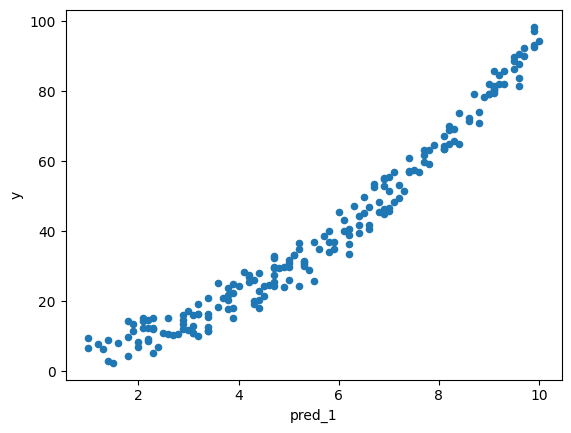

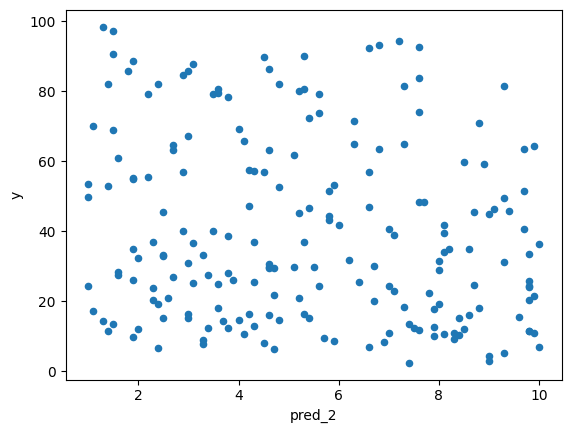

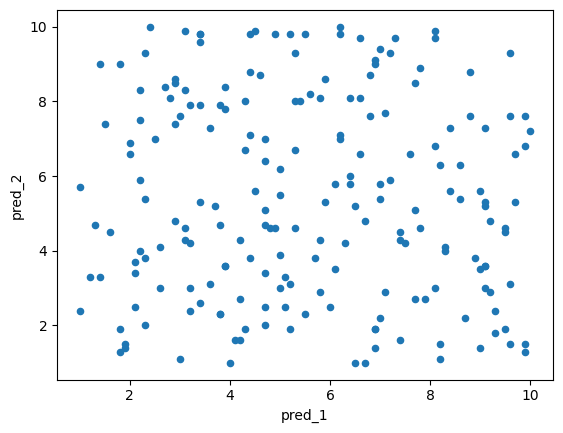

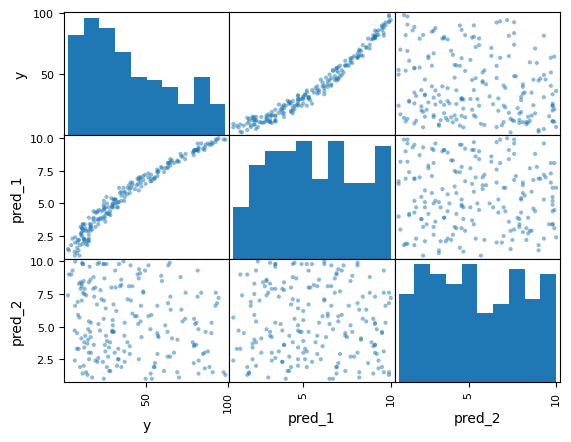

In [2]:
# Your code here.

# 1)
# read CSV file
df = pd.read_csv(filepath_or_buffer='my_dataset.csv')

# rename x1 and x2 to pred_1 and pred_2
df = df.rename(columns={'x1': 'pred_1', 'x2': 'pred_2'})

# print first 10 rows
print(df.head(10))

print('-' * 40)
# 2)
# delete 5th row
df = df.drop(index=4)

# replace the NaN
df.loc[5, 'pred_1'] = 9.5

# reset index
df = df.reset_index(drop=True)

# print first 10 rows
print(df.head(10))

# 3) scatter plots
df.plot.scatter(x='pred_1', y='y')
df.plot.scatter(x='pred_2', y='y')
df.plot.scatter(x='pred_1', y='pred_2')
pd.plotting.scatter_matrix(frame=df)

**Written answer: What do you see here? Discuss your findings**

In [3]:
# Your answer here.

# As it can be sa in the three plotted scatter plots. There is no clear relation between "y, pred_2" and "pred_1, pred_2".
# However, There is a meaningful relation between "pred_1" and "y". The relation between the two on them is almost linear and 
# a linear line (linear regression) can be used to predict value of "y" based on value of "pred_1".  

### Question 1.2: /5 point

Recall that the linear model, we obtain predictions by computing 

$$ \hat{\mathbf{y}} = \mathbf{X} \hat{\beta} $$

Here, $\mathbf{X}$ is a design matrix which includes a column of ones, $\hat{\beta}$ are coefficients, and $\hat{\mathbf{y}}$ are outcomes.  Write a function `linearModelPredict` to compute linear model predictions given data and a coefficient vector.  The function should take as it's arguments a 1d-array of coefficients `b` and the design matrix `X` as a 2d-array and return linear model predictions `yp`.

Test the function by setting 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
```

Call your function using these values. 

Report $\hat{\mathbf{y}}$. 

What is the dimensionality of the numpy-array that you get back? 

Hint:  Read the documentation for `np.dot` or the `@` operator in `numpy`.

In [4]:
# Your code here.

# predict function
def linearModelPredict(b, X):
    # calculate prediction
    yp = np.dot(X, b.T)
    return yp

X = np.array([[1, 0], [1, -1], [1, 2]])
b = np.array([0.1, 0.3])

# calculate prediction for sample X, b
yp = linearModelPredict(b=b, X=X)

# print results
print('Prediction: {}\n'.format(yp))

# What is the dimentionality of the numpy array that you get bacK?
# Answer: The dimentionality is 3 because the given X has 3 data point.

Prediction: [ 0.1 -0.2  0.7]



### Question 1.3: /15 points

Write a function `linearModelLossRSS` which computes and returns the loss function for an OLS model parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0,1.5],[1,-1,0.5],[1,2,2.5]])
b = np.array([0.1,0.3,0.85])
y = np.array([1.3,0.3,2]) 
```

Report the loss and the gradient. 


In [5]:
# Your code here.
def linearModelLossRSS(beta, X, y):

    # calculate y prediction
    yp = linearModelPredict(b=beta, X=X)

    # calculate residuals
    residuals = y-yp

    # calculate loss
    loss = np.sum(residuals**2)

    # calculate gradients
    gradients = -2 * np.dot(X.T, residuals.T)

    return (loss, gradients)

X = np.array([[1,0,1.5],[1,-1,0.5],[1,2,2.5]])
b = np.array([0.1,0.3,0.85])
y = np.array([1.3,0.3,2]) 

loss, gradients = linearModelLossRSS(beta=b, X=X, y=y)

print('Loss: {}'.format(loss))
print('Gradients: {}'.format(gradients))


Loss: 0.6918749999999996
Gradients: [1.65  3.45  4.275]


**Written answer**: To minimize the loss, do you need increase or decrease the value of the parameters? 

In [6]:
# Your answer here.

# All gradients of loss with respects to parameters are positive; therefore to minimize the loss function, parameters should be decreased.

### Question 1.4:  /15 points. 

Now that you've implemented a loss function in question 1.3, it is now time to minimize it!

Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument the design matrix `X` as a 2d-array, as its second argument a 1d-array `y` of outcomes, and as its third argument a function  `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss. As a result, it should return the estimated betas and the $R^2$. 

Test the function with the values: 
```
X = np.array([[1,0,1.5],[1,-1,0.5],[1,2,2.5]])
y = np.array([1.3,0.3,2])
```

Report best parameters and the fitted $R^2$ 


In [7]:
# Your code here.
def linearModelFit(X, y, lossfcn):

    # initial beta
    bstart = np.zeros(shape=(X.shape[1]))
    
    # minimize loss function
    results = so.minimize(lossfcn, bstart, args=(X, y), jac=True)

    # optimized weights
    optimized_b = results.x

    # calculate R-TWO
    yp = linearModelPredict(b=optimized_b, X=X)
    RSS = np.sum((y - yp)**2)
    TSS = np.sum((y-y.mean())**2)
    R_two = 1 - (RSS/TSS)

    print('All Results:\n {}'.format(results))

    return optimized_b, R_two

X = np.array([[1,0,1.5],[1,-1,0.5],[1,2,2.5]])
y = np.array([1.3,0.3,2])

optimized_b, R_two = linearModelFit(X, y, lossfcn=linearModelLossRSS)
print('Best Parameters:\n {}'.format(optimized_b))
print('R-TWO:\n {}'.format(R_two))

All Results:
   message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5.765414919914398e-13
        x: [-6.500e-01 -3.000e-01  1.300e+00]
      nit: 13
      jac: [ 1.016e-06  2.971e-06  3.401e-06]
 hess_inv: [[ 1.170e+01  5.731e+00 -8.957e+00]
            [ 5.731e+00  2.994e+00 -4.485e+00]
            [-8.957e+00 -4.485e+00  6.965e+00]]
     nfev: 14
     njev: 14
Best Parameters:
 [-0.65000159 -0.30000055  1.30000129]
R-TWO:
 0.9999999999996051


### Question 1.5: /15 points

Use the above functions to fit your model to the my_data. Use $y$ as the target variable and pred_1 as the predictor. Then use your model and the fitted parameters to make predictions along a grid of equally spaced values for the pred_1 variable. Note that, these new values must be within the original range of the pred_1 variable.  

Plot the data and add a line for the predicted values. You can get these by generating a new X-matrix with 100 equally spaced values (using for example [```np.linspace```](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Also report the $R^2$ value for the fit. You can do this by either printing out the $R^2$ of the fit or putting it on your plot via the `annotate` function in matplotlib.


All Results:
   message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 6953.752029579502
        x: [-1.660e+01  1.017e+01]
      nit: 4
      jac: [ 1.747e-11  3.749e-11]
 hess_inv: [[ 1.500e-02 -2.247e-03]
            [-2.247e-03  4.039e-04]]
     nfev: 7
     njev: 7
Best Parameters:
 [-16.60458764  10.16716402]
R-TWO:
 0.9484570099594501


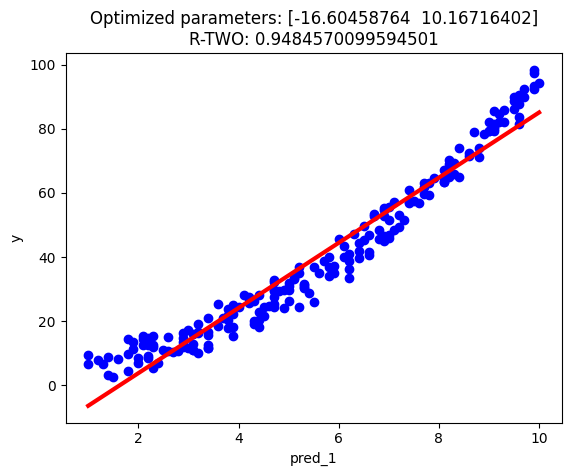

In [8]:
# Your code here.

# get pred_1 from dataframe
X_pred_1 = df['pred_1'].to_numpy()
X_pred_1_reshape = np.reshape(X_pred_1, newshape=(-1, 1))
# add one to it
X = np.concatenate((np.ones(shape=(X_pred_1_reshape.shape[0], 1)),  X_pred_1_reshape), axis=1)

# get y from dataframe
y = df['y'].to_numpy()

# optimize parameter of the model
optimized_b, R_two = linearModelFit(X, y, lossfcn=linearModelLossRSS)
print('Best Parameters:\n {}'.format(optimized_b))
print('R-TWO:\n {}'.format(R_two))

# fitted line
X_fitted_line = np.linspace(start=X_pred_1.min(), stop=X_pred_1.max(), num=100)
# Add 1
X_fitted_line_reshape = np.reshape(X_fitted_line, newshape=(-1, 1))
X_fitted_line_expanded = np.concatenate((np.ones(shape=(X_fitted_line_reshape.shape[0], 1)),  X_fitted_line_reshape), axis=1)
y_fitted_line = linearModelPredict(b=optimized_b, X=X_fitted_line_expanded)

plt.figure()
plt.scatter(X_pred_1, y, c='b')
plt.plot(X_fitted_line, y_fitted_line, 'r-', linewidth=3)
plt.xlabel('pred_1')
plt.ylabel('y')
plt.title('Optimized parameters: {}\nR-TWO: {}'.format(optimized_b, R_two))
plt.show()

## Part 2: LAD Regression

### Question 2.1:  /15 points

In the previous section, we worked with the squared loss.  Now, we'll implement a linear model with least absolute deviation loss.

Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model  parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0,1.5],[1,-1,0.5],[1,2,2.5]])
b = np.array([0.1,0.3,0.85])
y = np.array([1.3,0.3,2]) 
```

Report the loss and the gradient. 

In [9]:
# Your code here.
def linearModelLossLAD(beta, X, y):
    # calculate y prediction
    yp = linearModelPredict(b=beta, X=X)

    # calculate residuals
    residuals = y-yp

    # calculate loss
    loss = np.sum(np.abs(residuals))

    # calculate gradients
    gradients = -1 * np.dot(X.T, np.sign(residuals.T))

    return (loss, gradients)
    
X = np.array([[1,0,1.5],[1,-1,0.5],[1,2,2.5]])
b = np.array([0.1,0.3,0.85])
y = np.array([1.3,0.3,2]) 

loss, gradients = linearModelLossLAD(beta=b, X=X, y=y)
print('Loss: {}'.format(loss))
print('Gradients: {}'.format(gradients))


Loss: 0.9749999999999996
Gradients: [1.  3.  3.5]


### Question 2.2: /10 points


Use the above functions to fit your LAD model. Use your model to make predictions along a grid of 100 equally spaced values for pred_1.  Once fit, add the fitted line to the scatter plot as in question 1.5.  Also report the $R^2$-value. 

**Written answer**: What is the difference in the fit obtained with an L1 as compared to the L2 cost function? How their $R^2$ values compare? Why?  

Note: If you recieve an error from the optimizer, it may be because the loss function for the LAD model is not differentiable at its minimum.  This will lead to some gradient based optimizers to fail to converge.  If this happens to you then pass `method="Powell"` to `scipy.optimize.minimize`.



All Results:
   message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 947.4834392994023
        x: [-1.777e+01  1.034e+01]
      nit: 7
      jac: [-0.000e+00 -7.000e-01]
 hess_inv: [[ 2.078e-01 -2.112e-02]
            [-2.112e-02  2.219e-03]]
     nfev: 80
     njev: 77
Best Parameters:
 [-17.76826618  10.33659494]
R-TWO:
 0.9481210695099217


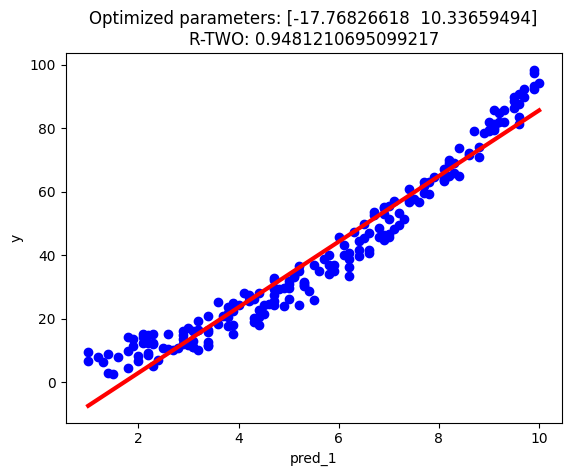

In [10]:
# Your code here

# get pred_1 from dataframe
X_pred_1 = df['pred_1'].to_numpy()
X_pred_1_reshape = np.reshape(X_pred_1, newshape=(-1, 1))
# add one to it
X = np.concatenate((np.ones(shape=(X_pred_1_reshape.shape[0], 1)),  X_pred_1_reshape), axis=1)

# get y from dataframe
y = df['y'].to_numpy()

# optimize parameter of the model
optimized_b, R_two = linearModelFit(X, y, lossfcn=linearModelLossLAD)
print('Best Parameters:\n {}'.format(optimized_b))
print('R-TWO:\n {}'.format(R_two))

# fitted line
X_fitted_line = np.linspace(start=X_pred_1.min(), stop=X_pred_1.max(), num=100)
# Add 1
X_fitted_line_reshape = np.reshape(X_fitted_line, newshape=(-1, 1))
X_fitted_line_expanded = np.concatenate((np.ones(shape=(X_fitted_line_reshape.shape[0], 1)),  X_fitted_line_reshape), axis=1)
y_fitted_line = linearModelPredict(b=optimized_b, X=X_fitted_line_expanded)

plt.figure()
plt.scatter(X_pred_1, y, c='b')
plt.plot(X_fitted_line, y_fitted_line, 'r-', linewidth=3)
plt.xlabel('pred_1')
plt.ylabel('y')
plt.title('Optimized parameters: {}\nR-TWO: {}'.format(optimized_b, R_two))
plt.show()

Written answer: 

The R-Twos fro LAD and RRS are almost similar. The value for LAR is 0.9481 and for RSS is 0.9484. RSS method has slightly better R-TWO. The reason is that
there are no data that can be considere as outlier.

### Question 2.3: /15 points

Now we will use all data for the fit. Fit an OLS model to the my_data with the `linear_model` module from the `sklearn` package by using the [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class.  In no more than two sentences, comment on the $R^2$ values from `sklearn` and the $R^2$ values from your models. Are they similar?

In [11]:
# Your code here

##################################################
# Case 1: Just use pred_1 for regression
##################################################
# All data as numpy
X = df.loc[:, ['pred_1']].to_numpy()
y = df.loc[:, 'y'].to_numpy()

reg = linear_model.LinearRegression().fit(X, y)
r_two = reg.score(X, y)

print('Case 1, Just use pred_1 for regression) R-TWO: {}'.format(r_two))

##################################################
# Case 2: use both pred_1 and pred_2 for regression
##################################################
# All data as numpy
X = df.loc[:, ['pred_1', 'pred_2']].to_numpy()
y = df.loc[:, 'y'].to_numpy()

reg = linear_model.LinearRegression().fit(X, y)
r_two = reg.score(X, y)

print('Case 2, use both pred_1 and pred_2 for regression) R-TWO: {}'.format(r_two))



Case 1, Just use pred_1 for regression) R-TWO: 0.9484570099594501
Case 2, use both pred_1 and pred_2 for regression) R-TWO: 0.9645589168801394


Written answer: 

Our OLS R-TWO with just "Pred_1" R-TWO:              0.9484570099594503

Our Lad R-TWO with just "Pred_1" R-TWO:              0.9481210695099217

Sklearn Using with just "Pred_1" R-TWO:              0.9484570099594501

Sklearn Using "pred_1" and "pred_2" R-TWO:           0.9645589168801394


I)  When using sklearn with only "pred_1", we obtain equal R-TWO to our implementation OLS, which show both method are the same.

II) When using sklearn with "pred_1" and "pred_2", better results that OLS with only "pred_1" is obtained which shows "pred_2" contributes good information.